In [1]:
# install git lfs
!apt-get install ffmpeg
!apt-get install git-lfs
!git lfs install

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fontconfig i965-va-driver libaacs0 libasound2 libasound2-data libass9
  libasyncns0 libavc1394-0 libavcodec57 libavdevice57 libavfilter6
  libavformat57 libavresample3 libavutil55 libbdplus0 libbluray2 libbs2b0
  libcaca0 libcairo2 libcdio-cdda2 libcdio-paranoia2 libcdio17 libchromaprint1
  libcroco3 libcrystalhd3 libdatrie1 libdc1394-22 libdrm-amdgpu1 libdrm-intel1
  libdrm-nouveau2 libdrm-radeon1 libfftw3-double3 libflac8 libflite1
  libfribidi0 libgdk-pixbuf2.0-0 libgdk-pixbuf2.0-bin libgdk-pixbuf2.0-common
  libgl1 libgl1-mesa-dri libglx-mesa0 libglx0 libgme0 libgsm1 libiec61883-0
  libjack-jackd2-0 libjbig0 libllvm6.0 libmp3lame0 libmpg123-0 libmysofa0
  libnuma1 libogg0 libopenal-data libopenal1 libopenjp2-7 libopenmpt0 libopus0
  libpango-1.0-0 libpangocairo-1.0-0 libpangoft2-1.0-0 libpciaccess0
  libpixman-1-0 libpostproc54 libpu

In [2]:
# clone repo
!git clone https://github.com/dandrid/sedias.git

Cloning into 'sedias'...
remote: Enumerating objects: 3599, done.
remote: Counting objects: 100% (3599/3599), done.
remote: Compressing objects: 100% (3591/3591), done.
remote: Total 3599 (delta 9), reused 3592 (delta 4), pack-reused 0
Receiving objects: 100% (3599/3599), 515.91 KiB | 953.00 KiB/s, done.
Resolving deltas: 100% (9/9), done.
Filtering content: 100% (3540/3540), 609.48 MiB | 3.29 MiB/s, done.


In [1]:
# Remove generated files for clean run all
!find . -type f -name '*22000.wav' -delete

# Verify that files were downloaded correcly
!ls sedias/data/RAVDESS/Actor_24/ -l

total 25644
-rw-r--r-- 1 root root 411950 Dec  9 17:40 03-01-01-01-01-01-24.wav
-rw-r--r-- 1 root root 405552 Dec  9 17:40 03-01-01-01-01-02-24.wav
-rw-r--r-- 1 root root 405338 Dec  9 17:40 03-01-01-01-02-01-24.wav
-rw-r--r-- 1 root root 402340 Dec  9 17:40 03-01-01-01-02-02-24.wav
-rw-r--r-- 1 root root 399146 Dec  9 17:40 03-01-02-01-01-01-24.wav
-rw-r--r-- 1 root root 392740 Dec  9 17:40 03-01-02-01-01-02-24.wav
-rw-r--r-- 1 root root 427976 Dec  9 17:40 03-01-02-01-02-01-24.wav
-rw-r--r-- 1 root root 411958 Dec  9 17:40 03-01-02-01-02-02-24.wav
-rw-r--r-- 1 root root 450472 Dec  9 17:40 03-01-02-02-01-01-24.wav
-rw-r--r-- 1 root root 447272 Dec  9 17:40 03-01-02-02-01-02-24.wav
-rw-r--r-- 1 root root 443992 Dec  9 17:40 03-01-02-02-02-01-24.wav
-rw-r--r-- 1 root root 450470 Dec  9 17:40 03-01-02-02-02-02-24.wav
-rw-r--r-- 1 root root 402428 Dec  9 17:40 03-01-03-01-01-01-24.wav
-rw-r--r-- 1 root root 431256 Dec  9 17:40 03-01-03-01-01-02-24.wav
-rw-r--r-- 1 root root 392818 Dec  9

In [4]:
# install dependencies
!apt-get install libsndfile1
!pip install soundfile
!pip install librosa


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libflac8 libogg0 libvorbis0a libvorbisenc2
The following NEW packages will be installed:
  libflac8 libogg0 libsndfile1 libvorbis0a libvorbisenc2
0 upgraded, 5 newly installed, 0 to remove and 8 not upgraded.
Need to get 557 kB of archives.
After this operation, 2,051 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libogg0 amd64 1.3.2-1 [17.2 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libflac8 amd64 1.3.2-1 [213 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libvorbis0a amd64 1.3.5-4.2 [86.4 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd64 libvorbisenc2 amd64 1.3.5-4.2 [70.7 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic/main amd64 libsndfile1 amd64 1.0.28-4 [169 kB]
Fetched 557 kB in 2s (248 kB/s)
Selecting previously unselected package lib

In [4]:
import numpy as np
import pandas as pd
import soundfile as sf
import librosa
from scipy.signal import spectrogram
import os
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, Activation, Convolution2D, MaxPooling2D, UpSampling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras import regularizers

Using TensorFlow backend.


In [0]:
class RAVDESS:

    def __init__(self, frequency):
        self.frequency = frequency
        self.separator = "-"
        self.audio_only = "03"
        self.voice_channel = "01"
        self.emotions = np.array([
            ("neutral", "01"), 
            ("calm", "02"), 
            ("happy", "03"), 
            ("sad", "04"), 
            ("angry", "05"), 
            ("fearful", "06"), 
            ("disgust", "07"), 
            ("surprised", "08")])
        self.emotion_intensities = np.array([("normal", "01"), ("strong", "02")])
        self.statements = np.array([("Kids_are_talking_by_the_door", "01"), ("Dogs_are_sitting_by_the_door", "02")])
        self.repetitions = np.array(["01", "02"])
        self.actors = np.array([
            ("male", "01"), 
            ("female", "02"), 
            ("male", "03"), 
            ("female", "04"), 
            ("male", "05"), 
            ("female", "06"), 
            ("male", "07"), 
            ("female", "08"),
            ("male", "09"),
            ("female", "10"),
            ("male", "11"), 
            ("female", "12"), 
            ("male", "13"), 
            ("female", "14"), 
            ("male", "15"), 
            ("female", "16"), 
            ("male", "17"), 
            ("female", "18"),
            ("male", "19"),
            ("female", "20"),
            ("male", "21"), 
            ("female", "22"),
            ("male", "23"), 
            ("female", "24")])
        self.shown_specs = 0
        return

    # Add noise to the audio to create more samples
    def createAudioWithNoise(self, data):
        mean, std = data.mean(), data.std()
        noised_data = []

        # Add noise based on the standard deviation
        for noise_intensity in np.arange(0.1, 0.3, 0.1):
            noise = np.random.normal(mean, std*noise_intensity, data.shape) 
            noised_data.append(data + noise)
        return noised_data

    # Creates the Data Frame for the RAVDESS
    def createDataFrame(self, add_noi):
        data = []
        
        label = 0 # label index
        suffix = 1 # suffix index
        
        print("loading audio files and enriching them")
        for emotion in self.emotions:
            for emotion_intensity in self.emotion_intensities:
                for statement in self.statements:
                    for repetition in self.repetitions:
                        for actor in self.actors:
                            actor_gender = actor[label]
                            original_file_path = "sedias/data/RAVDESS/Actor_" + actor[suffix] + "/" + self.addSepartors([ # construct the file name
                                    self.audio_only, 
                                    self.voice_channel, 
                                    emotion[suffix], 
                                    emotion_intensity[suffix], 
                                    statement[suffix], 
                                    repetition, 
                                    actor[suffix]])
                            converted_file_path = original_file_path + '-' + str(frequency) + ".wav"
                            original_file_path = original_file_path + ".wav"
                            
                            if os.path.isfile(converted_file_path):
                                print('Loading file from: ' + converted_file_path)
                                audio_data, samplerate = sf.read(converted_file_path) # load the audio
                                self.addData(data, audio_data, samplerate, emotion[label], emotion_intensity[label], statement[label], repetition, actor[suffix], actor_gender)
                                
                            elif os.path.isfile(original_file_path):
                                audio_data, samplerate = librosa.load(original_file_path, sr=frequency) # load and convert the audio
                                
                                audio_data_filtered, index = librosa.effects.trim(audio_data, top_db=30, frame_length=2048, hop_length=512)
                                
                                print('Writing file to: ' + converted_file_path)
                                print('Trimmed silence: ' + str(librosa.get_duration(audio_data) - librosa.get_duration(audio_data_filtered)))
                                librosa.output.write_wav(converted_file_path, audio_data_filtered, samplerate)
                                
                                self.addData(data, audio_data_filtered, samplerate, emotion[label], emotion_intensity[label], statement[label], repetition, actor[suffix], actor_gender)
                                
        print("number of samples: " + str(len(data)))

        df = pd.DataFrame(  # contruct DataFrame from data
            { 
                'emotion'           : pd.Categorical([row[0] for row in data]),
                'emotion_intensity' : pd.Categorical([row[1] for row in data]),
                'statement'         : pd.Categorical([row[2] for row in data]),
                'repetition'        : pd.Categorical([row[3] for row in data]),
                'actor'             : pd.Categorical([row[4] for row in data]),
                'actor_gender'      : pd.Categorical([row[5] for row in data]),
                'samplerate'        : pd.Categorical([row[6] for row in data]),
                'audio_data'        : pd.Series([row[7] for row in data]),
                'image'             : pd.Series([row[8] for row in data])
            })

        # one-hot encode columns
        df = pd.get_dummies(df, columns=["emotion", "emotion_intensity", "statement", "repetition", "actor", "actor_gender", "samplerate"])
        return df

    def addSepartors(self, fragments):
        return "-".join(fragments)
      
    def addData(self, data, audio_data, samplerate, emotion, emotion_intensity, statement, repetition, actor, actor_gender):
      #print(audio_data)
      #nfft = 512 # Fast Fourier transformation parameter
      #spect, f, t, image = plt.specgram(audio_data, nfft, samplerate, noverlap=nfft/2) # Create spectogram
      #plt.show()
      #data.append([emotion, emotion_intensity, statement, repetition, actor, actor_gender, samplerate, spect, image]) # add audio to the data
      
      # Cutting the audio data to smaller pieces with fixed length, and using overlapping windows
      window_lenght = samplerate * 1
      window_offset = math.floor(samplerate * 0.1)
      window_start = 0
      while window_start + window_lenght < audio_data.size:
        split_audio_data = audio_data[window_start : window_start + window_lenght]
        nfft = 128 # Fast Fourier transformation parameter
        spect, f, t, image = plt.specgram(split_audio_data, NFFT=nfft, Fs=samplerate, noverlap=nfft/2) # Create spectogram
        data.append([emotion, emotion_intensity, statement, repetition, actor, actor_gender, samplerate, spect, image]) # add audio to the data
        if self.shown_specs < 10 :
          plt.ylabel('Frequency [Hz]')
          plt.xlabel('Time [sec]')
          plt.show()
          self.shown_specs += 1
          
        window_start += window_offset
      



RAVDESS:
loading audio files and enriching them
Loading file from: sedias/data/RAVDESS/Actor_01/03-01-01-01-01-01-01-22000.wav


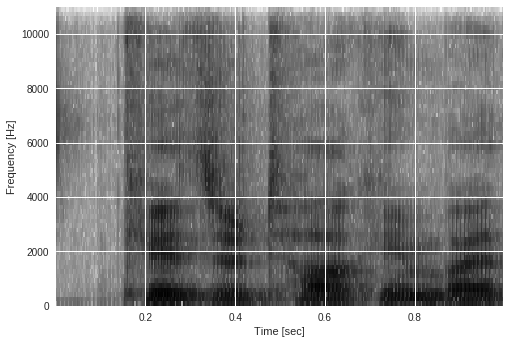

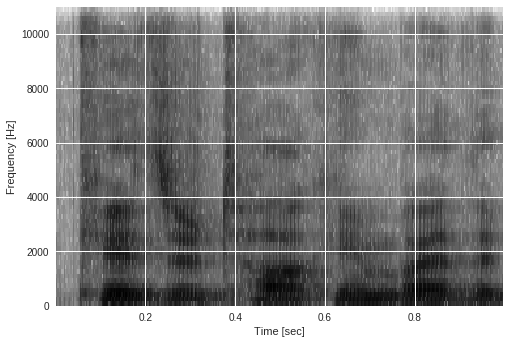

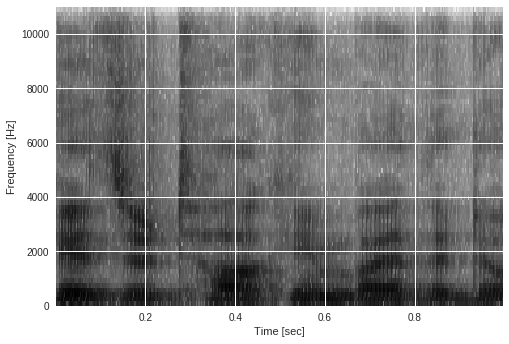

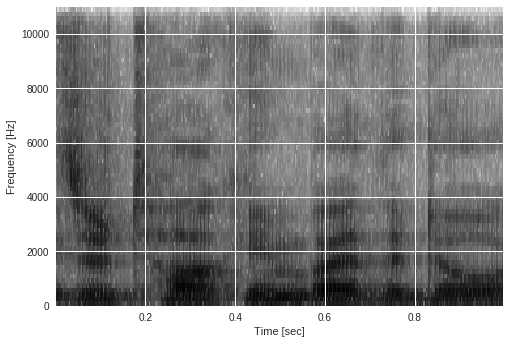

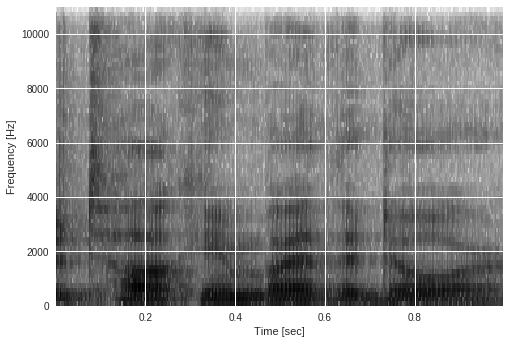

Loading file from: sedias/data/RAVDESS/Actor_02/03-01-01-01-01-01-02-22000.wav


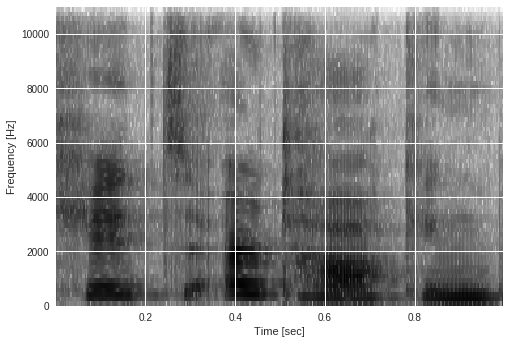

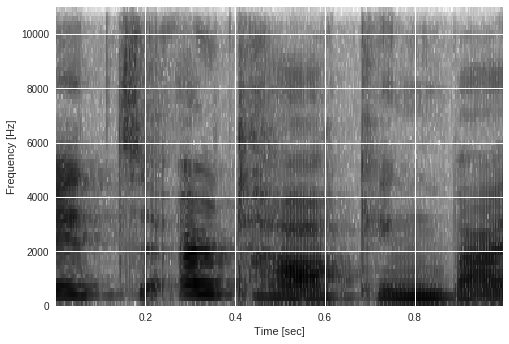

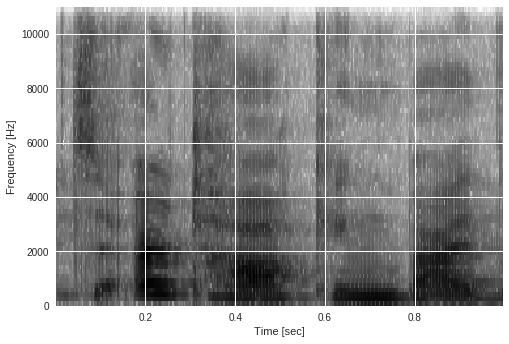

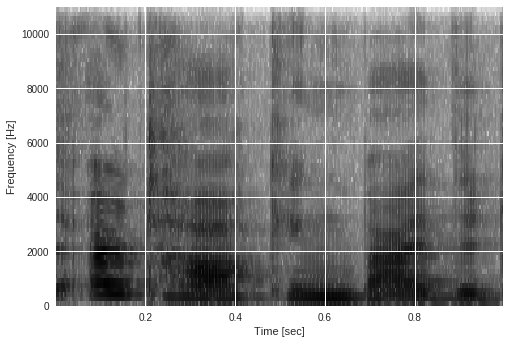

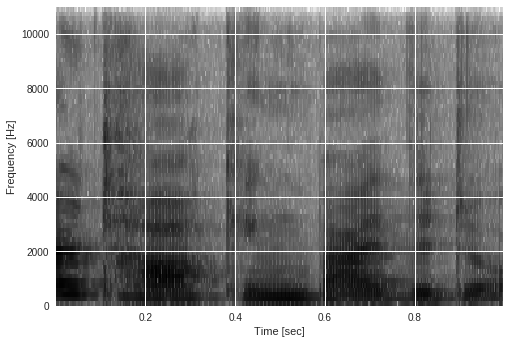

Loading file from: sedias/data/RAVDESS/Actor_03/03-01-01-01-01-01-03-22000.wav
Loading file from: sedias/data/RAVDESS/Actor_04/03-01-01-01-01-01-04-22000.wav
Loading file from: sedias/data/RAVDESS/Actor_05/03-01-01-01-01-01-05-22000.wav
Loading file from: sedias/data/RAVDESS/Actor_06/03-01-01-01-01-01-06-22000.wav
Loading file from: sedias/data/RAVDESS/Actor_07/03-01-01-01-01-01-07-22000.wav
Loading file from: sedias/data/RAVDESS/Actor_08/03-01-01-01-01-01-08-22000.wav
Loading file from: sedias/data/RAVDESS/Actor_09/03-01-01-01-01-01-09-22000.wav


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:7176: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


Loading file from: sedias/data/RAVDESS/Actor_10/03-01-01-01-01-01-10-22000.wav
Loading file from: sedias/data/RAVDESS/Actor_11/03-01-01-01-01-01-11-22000.wav
Loading file from: sedias/data/RAVDESS/Actor_12/03-01-01-01-01-01-12-22000.wav
Loading file from: sedias/data/RAVDESS/Actor_13/03-01-01-01-01-01-13-22000.wav
Loading file from: sedias/data/RAVDESS/Actor_14/03-01-01-01-01-01-14-22000.wav
Loading file from: sedias/data/RAVDESS/Actor_15/03-01-01-01-01-01-15-22000.wav
Loading file from: sedias/data/RAVDESS/Actor_16/03-01-01-01-01-01-16-22000.wav
Loading file from: sedias/data/RAVDESS/Actor_17/03-01-01-01-01-01-17-22000.wav
Loading file from: sedias/data/RAVDESS/Actor_18/03-01-01-01-01-01-18-22000.wav
Loading file from: sedias/data/RAVDESS/Actor_19/03-01-01-01-01-01-19-22000.wav
Loading file from: sedias/data/RAVDESS/Actor_20/03-01-01-01-01-01-20-22000.wav
Loading file from: sedias/data/RAVDESS/Actor_21/03-01-01-01-01-01-21-22000.wav
Loading file from: sedias/data/RAVDESS/Actor_22/03-0

KeyboardInterrupt: ignored

In [0]:
pd.set_option("max_columns" , None)

frequency = 22000
print("RAVDESS:")
ravdess = RAVDESS(frequency)
df_ravdess = ravdess.createDataFrame()
ravdess_len = df_ravdess.shape[0]

print("Date frame size: " + str(ravdess_len))

In [4]:
from IPython.display import Audio

Audio(filename="data/RAVDESS/Actor_01/03-01-01-01-01-01-01.wav")

In [1]:
df_ravdess.head()

NameError: name 'df_ravdess' is not defined

In [16]:
valid_split = 0.2
test_split = 0.1


X = df_ravdess['audio_data'].values

print(df_ravdess['audio_data'][0])
#X = [data.flatten() for data in X]
#flatten spectogram
#for idx, data in enumerate(X):
#  X[idx] = data.flatten()
  
  
y = df_ravdess.as_matrix(columns=['emotion_angry', 'emotion_calm', 'emotion_disgust', 'emotion_fearful', 'emotion_happy', 'emotion_neutral', 'emotion_sad',  'emotion_surprised'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split, random_state=1, shuffle=True)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=valid_split, random_state=1, shuffle=True)



sum = 0.0
count = 0.0
for data in X_train:
  sum += data.sum()
  count += data.size
mean = sum/count
print("mean: " + str(mean))


sum_mean_difference_square = 0
for data in X_train:
  for row in data:
    for value in row:
      sum_mean_difference_square += (value - mean)**2

std = math.sqrt(sum_mean_difference_square / count)
print("std: " + str(std))


def standardize_data(X_data, mean, std):
  for data in X_data:
    for row_idx, row in enumerate(data):
      for col_idx, value in enumerate(row):
        data[row_idx][col_idx] = (value - mean) / std

print("Standardizing train data. Size: " + str(X_train.size))
standardize_data(X_train, mean, std)

print("Standardizing validation data. Size: " + str(X_val.size))
standardize_data(X_val, mean, std)

print("Standardizing test data. Size: " + str(X_test.size))
standardize_data(X_test, mean, std)

[2.35920865e-15 3.75938571e-12 1.87727091e-12 ... 8.02175605e-19
 1.27881946e-20 1.30188693e-17]
mean: 1.57130533148717e-07


TypeError: ignored

NameError: ignored

In [0]:

class_num = y_train.size

model = Sequential()
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', input_shape=TODO))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(4, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(4, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(class_num, activation='softmax'))

model.summary()


model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])



history = model.fit(X_train, y_train,
          batch_size=20,
          nb_epoch=50,
          verbose=2, 
          validation_data=(X_valid,y_valid), 
          #callbacks=[reduce_lr, checkpointer, early_stopping, history]
         )

model.evaluate(X_test, y_test)

In [0]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)